In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv("historys-hockey-stick-gross-domestic-product-per-capita-using-the-ratio-scale-1990.csv")

# Pulling UK Data

In [3]:
UK_list = []
for i in range(data.shape[0]):
    if (data.loc[i,"Code"]) == "GBR":
        UK_list.append(i)

In [4]:
year_list = []
GDP_list = []
for i in UK_list:
    year_list.append(data.loc[i,"Year"])
    GDP_list.append(data.loc[i,"Real GDP per capita in 2011 US$"])

uk_df = pd.DataFrame({
    "Year": year_list,
    "GDP": GDP_list
})

In [5]:
uk_df = pd.DataFrame(uk_df[-100:])
read_ls = [i for i in range(218,317,1)]
growth_rate = []

for i in read_ls:
    growth_rate.append((uk_df.loc[i+1, "GDP"] - uk_df.loc[i, "GDP"])/uk_df.loc[i, "GDP"])

uk_avg_growth_rate = sum(growth_rate)/len(growth_rate)

exp_list = []
gdp_list = list(uk_df["GDP"])
for i in range(len(growth_rate)):
    exp_list.append(uk_df.loc[read_ls[0], "GDP"]*np.exp(uk_avg_growth_rate*i))

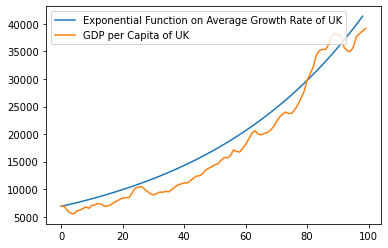

Average Growth Rate: 0.018308838809161638


In [6]:
plt.plot(exp_list,label = "Exponential Function on Average Growth Rate of UK")
plt.plot(gdp_list, label = "GDP per Capita of UK")
plt.legend()
plt.show()
print("Average Growth Rate: " + str(uk_avg_growth_rate))

# Pulling Indian Data

In [7]:
IND_list = []
for i in range(data.shape[0]):
    if (data.loc[i,"Code"]) == "IND":
        IND_list.append(i)

In [8]:
year_list = []
GDP_list = []
for i in IND_list:
    year_list.append(data.loc[i,"Year"])
    GDP_list.append(data.loc[i,"Real GDP per capita in 2011 US$"])

ind_df = pd.DataFrame({
    "Year": year_list,
    "GDP": GDP_list
})

In [9]:
ind_df = pd.DataFrame(ind_df[-31:])
read_ls = [i for i in range(114,144,1)]
growth_rate = []

for i in read_ls:
    growth_rate.append((ind_df.loc[i+1, "GDP"] - ind_df.loc[i, "GDP"])/ind_df.loc[i, "GDP"])

ind_avg_growth_rate = sum(growth_rate)/len(growth_rate)

ind_exp_list = []
uk_exp_list = []
gdp_list = list(ind_df["GDP"])
for i in range(len(growth_rate)):
    ind_exp_list.append(ind_df.loc[read_ls[0], "GDP"]*np.exp(ind_avg_growth_rate*i))
    uk_exp_list.append(ind_df.loc[read_ls[0], "GDP"]*np.exp(uk_avg_growth_rate*i))

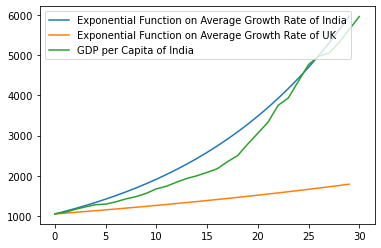

Average Growth Rate: 0.059794394545052906


In [10]:
plt.plot(ind_exp_list, label = "Exponential Function on Average Growth Rate of India")
plt.plot(uk_exp_list, label = "Exponential Function on Average Growth Rate of UK")
plt.plot(gdp_list, label = "GDP per Capita of India")
plt.legend()
plt.show()
print("Average Growth Rate: " + str(ind_avg_growth_rate))